In [1]:
import pandas as pd
Bachelor = pd.read_excel('/home/erq/Desktop/Documents_Enrique_Barrueco/Bachelor.xlsx')

In [3]:
Bachelor.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
41,Financial_and_Monetary_Methods_of_Economy_Regu...,6,2018-19,9.3,0,0,0,1
42,Econometrics_in_Research,4,2018-19,8.6,0,0,0,1
40,Financial_Markets,3,2018-19,8.6,0,0,0,1
37,Bachelor_Thesis,6,2018-19,8.3,0,0,0,1
33,Stochastic_Analysis_of_Financial_Risk,3,2018-19,8.3,0,0,0,1
32,Mathematical_Support_for_Financial_Decisions,4,2018-19,8.2,0,0,0,1
25,International_Economic_Organizations,6,2017-18,7.7,0,0,1,0
5,Economic_History_I,6,2015-16,7.6,1,0,0,0
11,Informatics,6,2014-15,7.6,1,0,0,0
30,Econometrics,6,2017-18,7.6,0,0,1,0


In [195]:
# Average for the 180 top ECTS credits

Ranked = Bachelor.sort_values('Grade', ascending=False)
Ranked.reset_index(inplace=True)

ECTS_Credits = 0
j = 0
Grade_Sum_Top = 0

while ECTS_Credits < 180:
    ECTS_Credits = Ranked['ECTS'][j] + ECTS_Credits
    Grade_Sum_Top = Ranked['Grade'][j] + Grade_Sum_Top
    j = j + 1
    
Avg_Top = Grade_Sum_Top/j
print("Taking the 32 subjects with the highest grade which sum to", ECTS_Credits,"my average is", Avg_Top, "out of 10" )


Taking the 32 subjects with the highest grade which sum to 180 my average is 6.80625 out of 10


In [5]:
#In total during my degree I have completed 246 credits
Bachelor['ECTS'].sum()

246

In [6]:
average = Bachelor['Grade'].sum()/len(Bachelor)
print("My average grade has been", round(average,2),"out of 10, this is an absolute mesasure, not a relative one, it is not compared to the rest of my classmates.")


My average grade has been 6.36 out of 10, this is an absolute mesasure, not a relative one, it is not compared to the rest of my classmates.


In [7]:
# Lets compute the average for each academic year:

First_Year = Bachelor['Academic_Year'] == '2015-16'
Avg_First = Bachelor[First_Year]['Grade'].sum()/len(Bachelor[First_Year])

Second_Year = Bachelor['Academic_Year'] == '2016-17'
Avg_Second = Bachelor[Second_Year]['Grade'].sum()/len(Bachelor[Second_Year])

Third_Year = Bachelor['Academic_Year'] == '2017-18'
Avg_Thrid = Bachelor[Third_Year]['Grade'].sum()/len(Bachelor[Third_Year])

Fourth_Year = Bachelor['Academic_Year'] == '2018-19'
Avg_Fourth = Bachelor[Fourth_Year]['Grade'].sum()/len(Bachelor[Fourth_Year])

Average_per_Course = [Avg_First, Avg_Second, Avg_Thrid, Avg_Fourth]
Average_per_Course

[5.7, 5.666666666666667, 6.1, 7.633333333333333]

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline 
#To avoid having type plt.show() to show the plot 

import numpy as np

Text(0.5, 1.0, 'Yearly Average Grade')

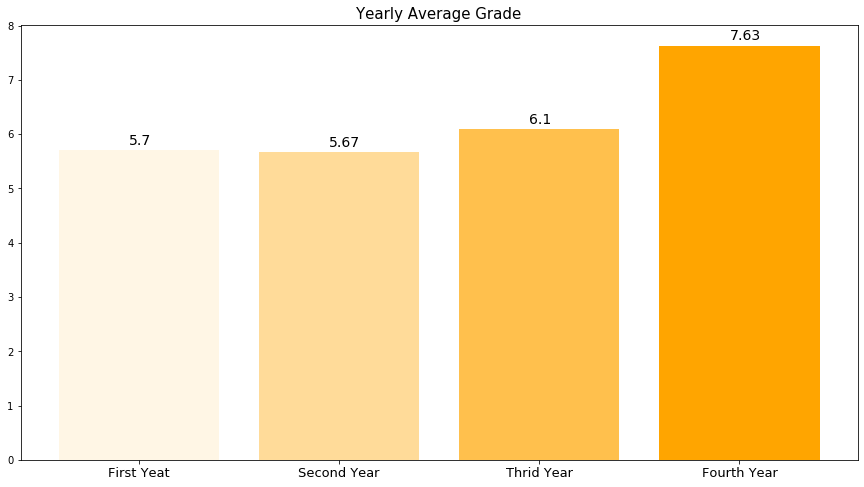

In [179]:
# Let's plot this result: 

Average_per_Course = [Avg_First, round(Avg_Second, 2), Avg_Thrid, round(Avg_Fourth, 2)]
Average_per_Course

Labels_Average_per_Course = ["First Yeat", "Second Year", "Thrid Year", "Fourth Year"]

y_pos = np.arange(len(Average_per_Course))


plt.figure(figsize=(15,8))

# Create bars
plt.bar(y_pos, Average_per_Course, color=(sns.light_palette("orange",n_colors=4)),alpha=1)
 
# Create names on the x-axis
plt.xticks(y_pos, Labels_Average_per_Course, fontsize=13)

# Insert value on top of each bar

xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

for i, v in enumerate(Average_per_Course):
    plt.text(xlocs[i] - 1.05, v + 0.1, str(v),fontsize=14)

# Title

plt.title("Yearly Average Grade", fontsize=15)


In [10]:
# I want to clasfiffy each subject into a relevant category.

Quant_Econ = []
Mathematics = []
Finance = []
Econ = []
Stats_and_Econometrics = []
Others = []

for Subject in Bachelor['Subject']:
    
    if ('Micro' in Subject) or ('Macro' in Subject) or ('Methods' in Subject) or ('Infor' in Subject):
        Quant_Econ.append(Subject)
        #print(Subject)
        
    elif 'Math' in Subject or 'Opti' in Subject:
        Mathematics.append(Subject)
        #print(Subject)
        
    elif ('Financ' in Subject) or ('Accou' in Subject):
        Finance.append(Subject)
        #print(Subject)
    
    elif 'Econometrics' in Subject or 'Stati' in Subject:
        Stats_and_Econometrics.append(Subject)
        #print(Subject)
    
    elif ('Econ' in Subject) or ('Tax' in Subject) and (Subject not in Quant_Econ):
        Econ.append(Subject)
        #print(Subject)
    
    elif 'Thesis' in Subject:
        Thesis = Subject
        
    else:
        Others.append(Subject)

In [11]:
Stats_and_Econometrics = Bachelor["Subject"].isin([Stats_and_Econometrics][0])
Stats_and_Econometrics = Bachelor[Stats_and_Econometrics]
Stats_and_Econometrics.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
42,Econometrics_in_Research,4,2018-19,8.6,0,0,0,1
30,Econometrics,6,2017-18,7.6,0,0,1,0
35,Applied_Econometrics,6,2018-19,7.0,0,0,0,1
16,Statistics_II,6,2018-19,6.4,0,1,0,0
8,Statistics_I,6,2015-16,5.1,1,0,0,0


In [136]:
# Average and number of credits in Statistics and Econometrics

Avg_Stats_and_Econometrics = Stats_and_Econometrics['Grade'].mean()
Mdn_Stats_and_Econometrics = Stats_and_Econometrics['Grade'].median()

print("Average in Statistics and Econometrics is", Avg_Stats_and_Econometrics, "out of 10")
print("Median in Statistics and Econometrics is", Mdn_Stats_and_Econometrics, "out of 10")

print("Total number of Statistics and Econometrics ECTS:", Stats_and_Econometrics['ECTS'].sum())

Average in Statistics and Econometrics is 6.94 out of 10
Median in Statistics and Econometrics is 7.0 out of 10
Total number of Statistics and Econometrics ECTS: 28


In [13]:
Avg_Econometrics = (8.6+7.6+7)/3

print("Average in Econometrics is", round(Avg_Econometrics, 2), "out of 10")
print("Total number of Econometrics ECTS: 16")

Average in Econometrics is 7.73 out of 10
Total number of Econometrics ECTS: 16


In [14]:
Quant_Econ = Bachelor["Subject"].isin([Quant_Econ][0])
Quant_Econ = Bachelor[Quant_Econ]
Quant_Econ.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
41,Financial_and_Monetary_Methods_of_Economy_Regu...,6,2018-19,9.3,0,0,0,1
11,Informatics,6,2014-15,7.6,1,0,0,0
31,Advanced_Macroeconomics,6,2018-19,7.3,0,0,0,1
22,Macroeconomics_II,6,2017-18,6.5,0,0,1,0
18,Methods_of_Applied_Economics,6,2016-17,6.1,0,1,0,0
12,Microeconomics_II,6,2016-17,5.9,0,1,0,0
27,Macroeconomics_III,8,2017-18,5.7,0,0,1,0
0,Microeconomics_I,6,2016-17,5.5,1,0,0,0
17,Microeconomics_III,6,2016-17,5.2,0,1,0,0
7,Macroeconomics_I,6,2015-16,5.0,1,0,0,0


In [135]:
# Average and number of credits in Quantitative Economics

Avg_Quant_Econ = Quant_Econ['Grade'].mean()
Mdn_Quant_Econ = Quant_Econ['Grade'].median()
print("Average in Quantitative economics is", round(Avg_Quant_Econ, 2), "out of 10")
print("Median in Quantitative economics is", round(Mdn_Quant_Econ, 2), "out of 10")

print("Total number of Quantitative Economics ECTS:", Quant_Econ['ECTS'].sum())



Average in Quantitative economics is 6.41 out of 10
Median in Quantitative economics is 6.0 out of 10
Total number of Quantitative Economics ECTS: 62


In [16]:
Mathematics = Bachelor["Subject"].isin([Mathematics][0])
Mathematics = Bachelor[Mathematics]
Mathematics.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
32,Mathematical_Support_for_Financial_Decisions,4,2018-19,8.2,0,0,0,1
34,Game_Theory_and_Dynamic_Optimization,6,2018-19,7.0,0,0,0,1
9,Mathematics_II,6,2015-16,6.1,1,0,0,0
2,Mathematics_I,6,2016-17,5.0,1,0,0,0
15,Mathematics_III,6,2017-18,5.0,0,1,0,0


In [137]:
# Average and number of credits in Mathematics

Avg_Mathematics = Mathematics['Grade'].mean()
Mdn_Mathematics = Mathematics['Grade'].median()


print("Average in Mathematics is", Avg_Mathematics, "out of 10")
print("Median in Mathematics is", Mdn_Mathematics, "out of 10")
print("Total number of Mathematics ECTS:", Mathematics['ECTS'].sum())

Average in Mathematics is 6.26 out of 10
Median in Mathematics is 6.1 out of 10
Total number of Mathematics ECTS: 28


In [18]:
Finance = Bachelor["Subject"].isin([Finance][0])
Finance = Bachelor[Finance]
Finance.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
40,Financial_Markets,3,2018-19,8.6,0,0,0,1
33,Stochastic_Analysis_of_Financial_Risk,3,2018-19,8.3,0,0,0,1
39,International_Corporate_Finance,4,2018-19,7.2,0,0,0,1
14,Analytical_Accounting,6,2016-17,6.5,0,1,0,0
21,Finance,6,2016-17,6.3,0,1,0,0
29,Monetary_and_Financial_Economics,6,2016-17,5.5,0,0,1,0
38,Financial_Theory,6,2018-19,5.4,0,0,0,1
3,Financial_Accounting,6,2015-16,5.2,1,0,0,0


In [145]:
# Average and number of credits in Finace

Avg_Finance = Finance['Grade'].mean()
Mdn_Finance = Finance['Grade'].median()

print("Average in Finance is", round(Avg_Finance,2), "out of 10")
print("Median in Finance is", Mdn_Finance, "out of 10")
print("Total number of Finance ECTS:", Finance['ECTS'].sum())

Average in Finance is 6.63 out of 10
Median in Finance is 6.4 out of 10
Total number of Finance ECTS: 40


In [20]:
Econ = Bachelor["Subject"].isin([Econ][0])
Econ = Bachelor[Econ]
Econ.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
25,International_Economic_Organizations,6,2017-18,7.7,0,0,1,0
5,Economic_History_I,6,2015-16,7.6,1,0,0,0
26,Economic_Policy,6,2017-18,6.1,0,0,1,0
19,International_Economics,6,2015-16,6.0,0,1,0,0
4,Business_Economics,6,2015-16,5.8,1,0,0,0
36,Monetary_Economics_Theory_and_Practice,6,2017-18,5.8,0,0,0,1
23,Public_Economics,6,2017-18,5.5,0,0,1,0
13,World_Economy,6,2015-16,5.2,0,1,0,0
6,Economic_Law,6,2015-16,5.0,1,0,0,0
20,Economic_History_II,6,2015-16,5.0,0,1,0,0


In [146]:
# Average and number of credits in Economics

Avg_Econ = Econ['Grade'].mean()
Mdn_Econ = Econ['Grade'].median()

print("Average in Economics is", round(Avg_Econ, 2), "out of 10")
print("Median in Economics is", round(Mdn_Econ, 2), "out of 10")
print("Total number of Economics ECTS:", Econ['ECTS'].sum())

Average in Economics is 5.81 out of 10
Median in Economics is 5.65 out of 10
Total number of Economics ECTS: 72


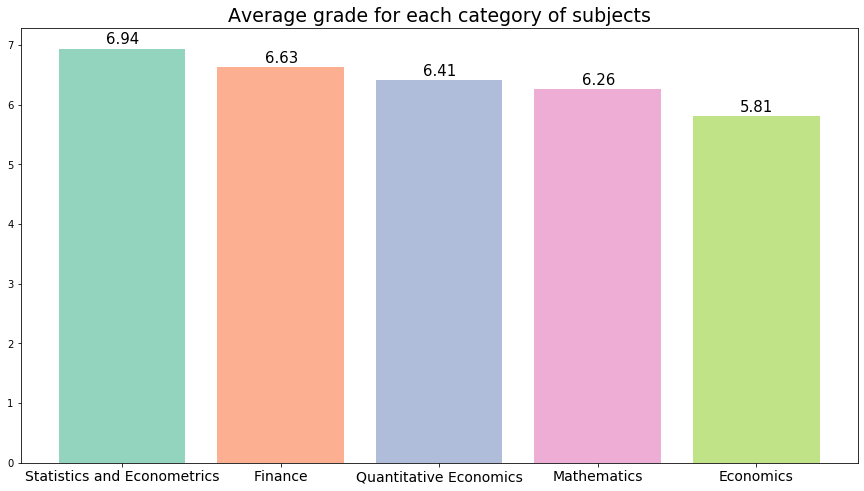

In [194]:
# Let's plot how I performed in each category of subjects
Average_Block_Subjcets = [Avg_Stats_and_Econometrics, round(Avg_Finance,2), round(Avg_Quant_Econ, 2), Avg_Mathematics, round(Avg_Econ, 2)]
Labels = ['Statistics and Econometrics','Finance', 'Quantitative Economics', 'Mathematics', 'Economics']

# Create array
y_pos = np.arange(len(Average_Block_Subjcets))

# Size
plt.figure(figsize=(15,8))

# Bars
plt.bar(y_pos, Average_Block_Subjcets, color = (sns.color_palette("Set2")),alpha=0.7 )
 
# Create names on the x-axis
plt.xticks(y_pos, Labels, fontsize=14)

# title
plt.title("Average grade for each category of subjects", fontsize=19)

#Values on top of each bar

xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

for i, v in enumerate(Average_Block_Subjcets):
    plt.text(xlocs[i] - 1.1, v + 0.075, str(v), fontsize=15)


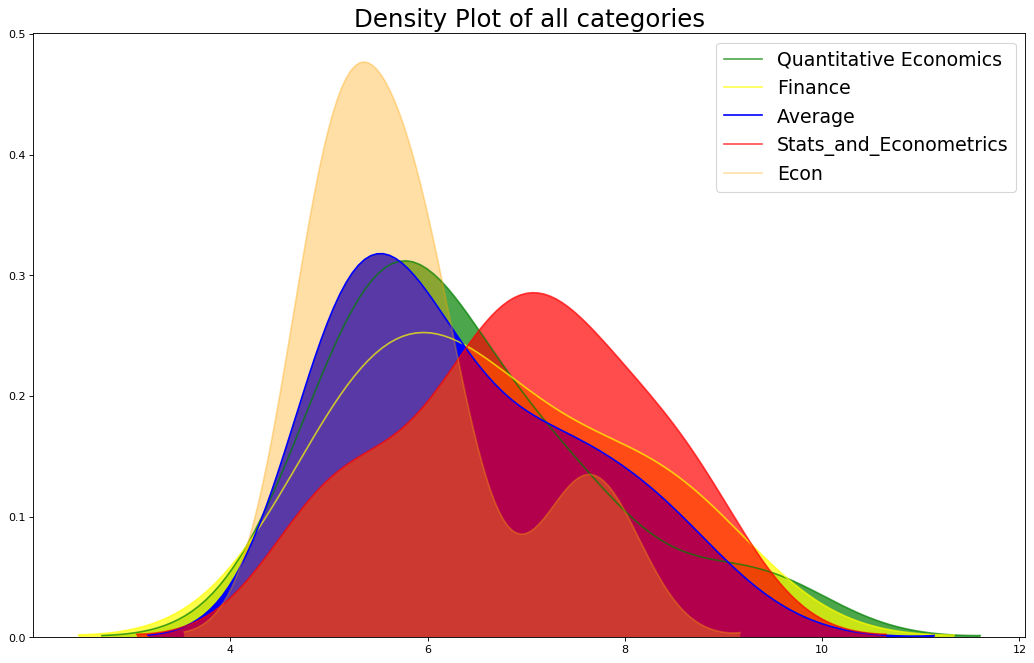

In [201]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(Quant_Econ['Grade'], shade=True, color="g", label="Quantitative Economics", alpha=.7)
sns.kdeplot(Finance['Grade'], shade=True, color="yellow", label="Finance", alpha=.7)
sns.kdeplot(Bachelor['Grade'], shade=True, color="blue", label="Average", alpha=1)
sns.kdeplot(Stats_and_Econometrics['Grade'], shade=True, color="red", label="Stats_and_Econometrics", alpha=.7)
sns.kdeplot(Econ['Grade'], shade=True, color="orange", label="Econ", alpha=.35)

# Decoration
plt.title('Density Plot of all categories', fontsize=22)
plt.legend(fontsize=17)
plt.show()


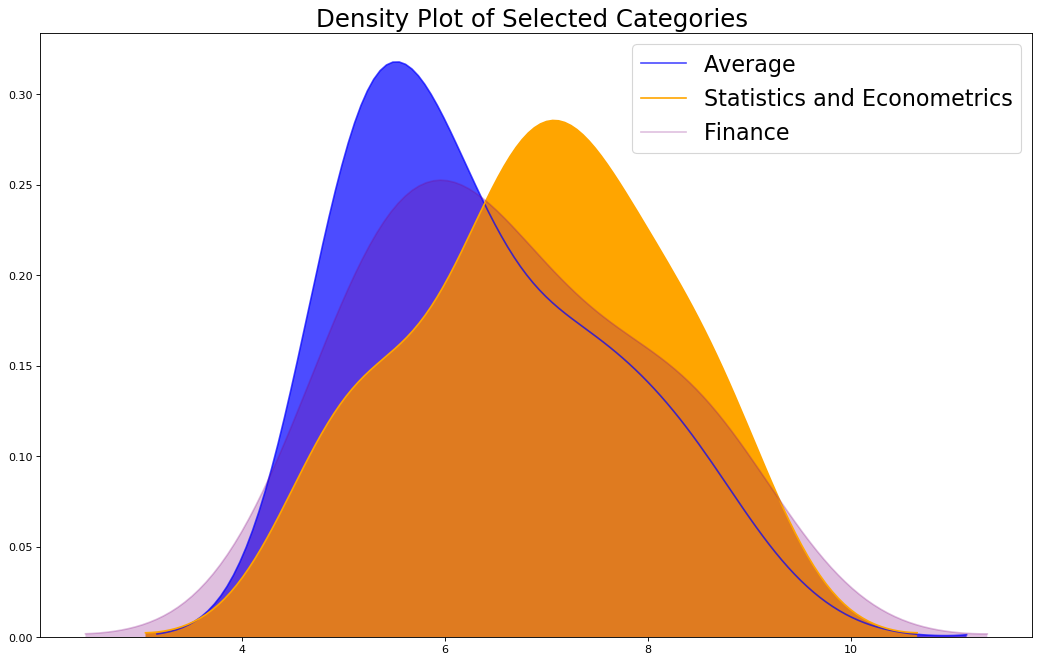

In [200]:
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(Bachelor['Grade'], shade=True, color="blue", shade_lowest=False, label="Average", alpha=.7)
sns.kdeplot(Stats_and_Econometrics['Grade'], shade=True, color="orange",shade_lowest=False, label="Statistics and Econometrics", alpha=1)
sns.kdeplot(Finance['Grade'], shade=True, color="purple",shade_lowest=False, label="Finance", alpha=0.25)
plt.legend(fontsize=20)

plt.title('Density Plot of Selected Categories ', fontsize=22)

plt.show()

